In [1]:
## Data preprocessing

# import needed libaries and load data
import pandas as pd
loan = pd.read_csv('/Users/babs/Desktop/MBA/Data Mining/UniversalBank2.csv')

In [2]:
# identify data properties
loan.shape

(5000, 12)

In [3]:
loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,Undergrad,0,yes,no,no,no,no
1,45,19,34,3,1.5,Undergrad,0,yes,no,no,no,no
2,39,15,11,1,1.0,Undergrad,0,no,no,no,no,no
3,35,9,100,1,2.7,Graduate,0,no,no,no,no,no
4,35,8,45,4,1.0,Graduate,0,no,no,no,yes,no


In [4]:
loan.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

In [5]:
# How many customers didn't accept the loan offer?
# Target var is 'Personal Loan'
loan['Personal Loan'].value_counts()

no     4520
yes     480
Name: Personal Loan, dtype: int64

In [10]:
# perform label encoding and split data into training and test set
x = pd.get_dummies(loan.iloc[:,0:11], drop_first = True)

In [11]:
x

,Age,Experience,Income,Family,CCAvg,Mortgage,Education_Professional,Education_Undergrad,Securities Account_yes,CD Account_yes,Online_yes,CreditCard_yes
0,25,1,49,4,1.6,0,0,1,1,0,0,0
1,45,19,34,3,1.5,0,0,1,1,0,0,0
2,39,15,11,1,1.0,0,0,1,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0
4,35,8,45,4,1.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,0,1,0,0,0,1,0
4996,30,4,15,4,0.4,85,0,1,0,0,1,0
4997,63,39,24,2,0.3,0,1,0,0,0,0,0
4998,65,40,49,3,0.5,0,0,0,0,0,1,0


In [12]:
# perform label encoding on target variable
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(loan['Personal Loan'].values)

In [13]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
# Split data into training and test set (25%)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)
x_train.shape

(3750, 12)

In [15]:
## Build a decision tree model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [16]:
## Evaluate and interpret the tree
from sklearn.metrics import accuracy_score
y_pred = tree.predict(x_test)

In [17]:
print('Accuracy on test set: {:3f}'.format(accuracy_score(y_pred,y_test)))

Accuracy on test set: 0.981600


/Users/babs/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


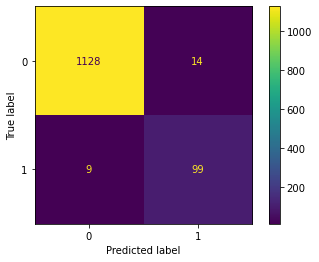

In [19]:
# Take a look at model confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree,x_test,y_test)

In [20]:
# Evaluate importance level of each predictor
importance = pd.DataFrame(tree.feature_importances_, index = x.columns, columns = ['Importance'])
importance

,Importance
Age,0.014981
Experience,0.011903
Income,0.447337
Family,0.130230
CCAvg,0.081564
Mortgage,0.006679
Education_Professional,0.003730
Education_Undergrad,0.280686
Securities Account_yes,0.000000
CD Account_yes,0.017300


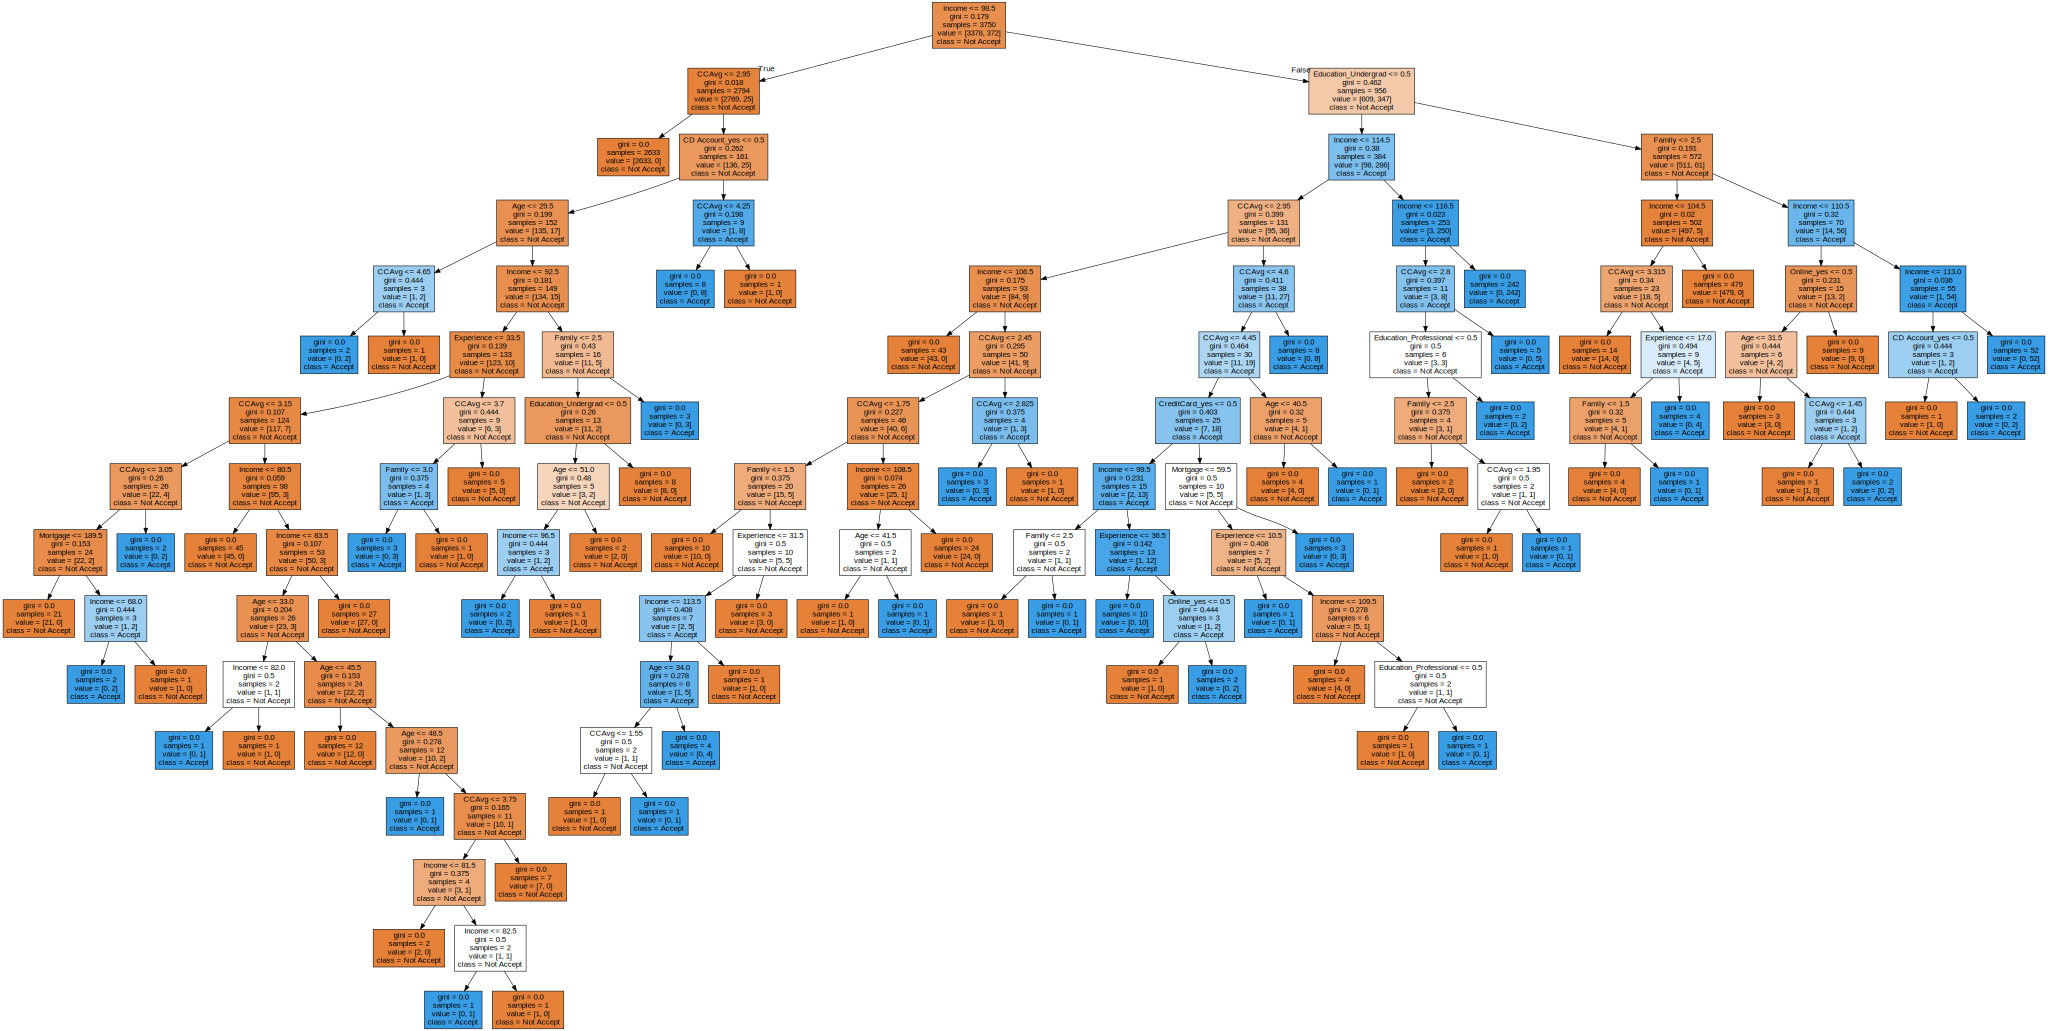

In [22]:
# Visualize Decision Tree
loan_feature_names = x.columns.tolist()
loan_feature_names
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree,class_names = ['Not Accept', 'Accept'], feature_names = loan_feature_names, filled = True)

graph = graphviz.Source(dot_data, format = 'png')
graph

In [24]:
# Create ROC curve

import matplotlib.pyplot as plt
from sklearn import metrics
# calculate false positive and true positive rates
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred)
tpr


array([0.        , 0.91666667, 1.        ])

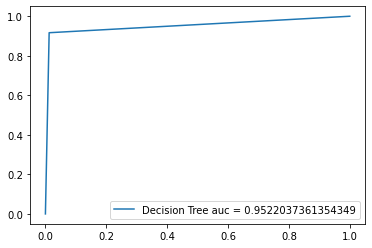

In [25]:
# calculate auc value
auc = metrics.roc_auc_score(y_test,y_pred)
# plot
plt.plot(fpr,tpr,label= 'Decision Tree auc = '+str(auc))
plt.legend(loc=4)
plt.show()